## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
comb_mouse_study_results_df=pd.merge(mouse_metadata,study_results,how='outer',on='Mouse ID')
# Display the data table for preview
comb_mouse_study_results_df.head()

comb_mouse_study_results_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [3]:
# Checking the number of mice.
mice_count=len(comb_mouse_study_results_df["Mouse ID"].unique())
print(mice_count)

249


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

dup_mouse_id = comb_mouse_study_results_df.loc[comb_mouse_study_results_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Clean_mouse_study_results_df=comb_mouse_study_results_df[comb_mouse_study_results_df['Mouse ID'].isin(dup_mouse_id)==False]
Clean_mouse_study_results_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
Clean_mouse_study_results_df.count()

Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
clean_mouse_study_res_group=Clean_mouse_study_results_df.groupby(['Drug Regimen'])
tumor_vol_mean=clean_mouse_study_res_group['Tumor Volume (mm3)'].mean()

tumor_vol_median=clean_mouse_study_res_group['Tumor Volume (mm3)'].median()
print(tumor_vol_median)

tumor_vol_var=clean_mouse_study_res_group['Tumor Volume (mm3)'].var()
print(tumor_vol_var)

tumor_vol_std=clean_mouse_study_res_group['Tumor Volume (mm3)'].std()
print(tumor_vol_std)

tumor_vol_sem=clean_mouse_study_res_group['Tumor Volume (mm3)'].sem()
print(tumor_vol_sem)


Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
drug_regimen_stats_df=pd.DataFrame({'Tumor Volume Mean': tumor_vol_mean,
                                 'Tumor Volume Median': tumor_vol_median,
                                 "Tumor Volume VAR": tumor_vol_var,
                                 "Tumor Volume STD": tumor_vol_std,
                                   "Tumor Volume SEM":tumor_vol_sem})
drug_regimen_stats_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume VAR,Tumor Volume STD,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

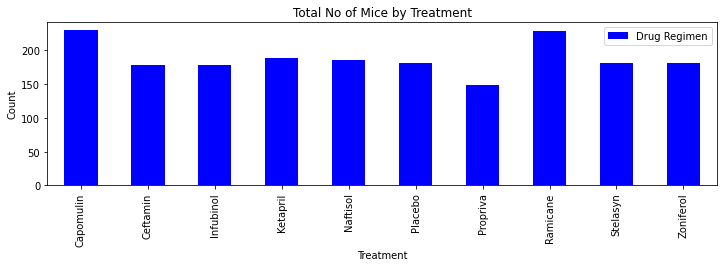

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

Tot_Mice_Treatment_group_df=Clean_mouse_study_results_df.groupby('Drug Regimen')
No_of_Mice_Treatment=pd.DataFrame(Tot_Mice_Treatment_group_df['Drug Regimen'].count())

Tot_Mice_Bar_Chart=No_of_Mice_Treatment.plot(kind="bar", color="blue", figsize=(12,3))

# Set a title for the chart
Tot_Mice_Bar_Chart.set_title("Total No of Mice by Treatment")
Tot_Mice_Bar_Chart.set_ylabel("Count")
Tot_Mice_Bar_Chart.set_xlabel("Treatment")
plt.show()

Text(0.5, 0, 'Treatment')

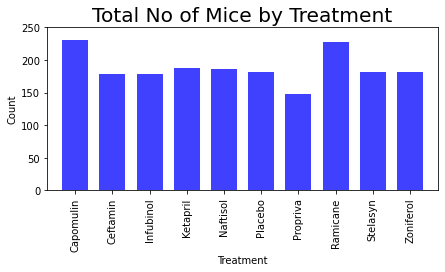

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis=np.arange(len(No_of_Mice_Treatment))

plt.figure(figsize=(7,3))
tick_locations=[i for i in x_axis]
plt.xticks(tick_locations,list(No_of_Mice_Treatment.index),rotation="vertical")

plt.style.use('fivethirtyeight')
plt.bar(x_axis,No_of_Mice_Treatment["Drug Regimen"],color="b", alpha=0.75, align="center",width = 0.7)

plt.xlim(-0.75, len(No_of_Mice_Treatment)-.25)
plt.ylim(0, 250)

plt.title("Total No of Mice by Treatment")
plt.ylabel("Count")
plt.xlabel("Treatment")


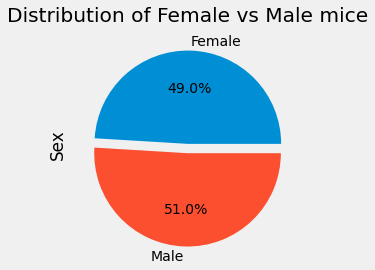

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

Mice_gender_group_df=Clean_mouse_study_results_df.groupby('Sex')
Total_mice_gender_df=pd.DataFrame(Mice_gender_group_df['Sex'].count())
#Total_mice_gender_df
explode = (0, 0.1)

Total_mice_gender_df.plot(kind='pie',y='Sex',autopct='%1.1f%%',legend=False,explode=explode, title="Distribution of Female vs Male mice")


plt.savefig('pie plot using pandas')
plt.show()

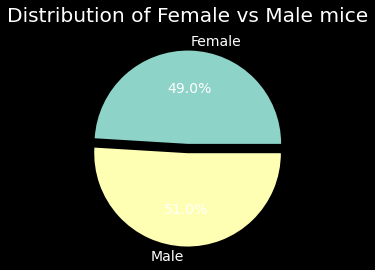

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

genders = list(Total_mice_gender_df.index.values)

# The values of each section of the pie chart
Total_mice_gender = Total_mice_gender_df['Sex']

explode = (0, 0.1)

plt.style.use('dark_background')
plt.pie(Total_mice_gender,labels=genders,autopct='%1.1f%%',explode=explode)
plt.title("Distribution of Female vs Male mice")
plt.savefig('pie plot using pyplot')
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_df = comb_mouse_study_results_df.loc[comb_mouse_study_results_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = comb_mouse_study_results_df.loc[comb_mouse_study_results_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = comb_mouse_study_results_df.loc[comb_mouse_study_results_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = comb_mouse_study_results_df.loc[comb_mouse_study_results_df["Drug Regimen"] == "Ceftamin", :]
capomulin_df.head()

#Ramicane_df.head()
#Infubinol_df.head()

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [15]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_list=['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_list=[]

# Locate the rows which contain mice on each drug and get the tumor volumes
for d in treatment_list:
    DrugData=comb_mouse_study_results_df.loc[comb_mouse_study_results_df["Drug Regimen"] == d]["Tumor Volume (mm3)"] 

    # add subset 
    tumor_list.append(DrugData)  


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = DrugData.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
                                             
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    # Determine outliers using upper and lower bounds
    print(f"{d} potential outliers could be : {DrugData.loc[(DrugData < lower_bound) | (DrugData > upper_bound)]}")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

IndentationError: unexpected indent (<ipython-input-15-3a0314f50fae>, line 18)

In [16]:
# capomulin dataset for plotting
# Start by getting the last (greatest) timepoint for each mouse
capomulin_last = capomulin_df.groupby('Mouse ID').max()['Timepoint']
capomulin_last_df = pd.DataFrame(capomulin_last)


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

capomulin_lmerge_df = pd.merge(capomulin_last_df, comb_mouse_study_results_df, on=("Mouse ID","Timepoint"),how="left")
capomulin_lmerge_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [17]:
# Locate the rows which contain mice on each drug and get the tumor volumes
capomulin_treat = capomulin_lmerge_df["Tumor Volume (mm3)"]

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = capomulin_treat.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(lowerq)
print(upperq)
print(iqr)

    # Determine outliers using upper and lower bounds
lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)
print(f"Capomulin potential outliers could be values below {lower_bound} and above {upper_bound} could be outliers.")

32.37735684
40.1592203
7.781863460000004
Capomulin potential outliers could be values below 20.7 and above 51.83 could be outliers.


In [18]:
# Ramicane dataset for plotting
# Start by getting the last (greatest) timepoint for each mouse
Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_last_df = pd.DataFrame(Ramicane_last)


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

Ramicane_lmerge_df = pd.merge(Ramicane_last_df, comb_mouse_study_results_df, on=("Mouse ID","Timepoint"),how="left")
Ramicane_lmerge_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [19]:
# Locate the rows which contain mice on each drug and get the tumor volumes
Ramicane_treat = Ramicane_lmerge_df["Tumor Volume (mm3)"]

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = Ramicane_treat.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(lowerq)
print(upperq)
print(iqr)

    # Determine outliers using upper and lower bounds
lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)
print(f"Ramicane potential outliers could be values below {lower_bound} and above {upper_bound} could be outliers.")

31.56046955
40.65900627
9.098536719999998
Ramicane potential outliers could be values below 17.91 and above 54.31 could be outliers.


In [20]:
# Infubinol dataset for plotting
# Start by getting the last (greatest) timepoint for each mouse
Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_last_df = pd.DataFrame(Infubinol_last)


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

Infubinol_lmerge_df = pd.merge(Infubinol_last_df, comb_mouse_study_results_df, on=("Mouse ID","Timepoint"),how="left")
Infubinol_lmerge_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [21]:
# Locate the rows which contain mice on each drug and get the tumor volumes
Infubinol_treat = Infubinol_lmerge_df["Tumor Volume (mm3)"]

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = Infubinol_treat.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(lowerq)
print(upperq)
print(iqr)

    # Determine outliers using upper and lower bounds
lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)
print(f"Infubinol potential outliers could be values below {lower_bound} and above {upper_bound} could be outliers.")

54.04860769
65.52574285
11.477135160000003
Infubinol potential outliers could be values below 36.83 and above 82.74 could be outliers.


In [22]:
# Ceftamin dataset for plotting
# Start by getting the last (greatest) timepoint for each mouse
Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_last_df = pd.DataFrame(Ceftamin_last)


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

Ceftamin_lmerge_df = pd.merge(Ceftamin_last_df, comb_mouse_study_results_df, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_lmerge_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [23]:
# Locate the rows which contain mice on each drug and get the tumor volumes
Ceftamin_treat = Ceftamin_lmerge_df["Tumor Volume (mm3)"]

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = Ceftamin_treat.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(lowerq)
print(upperq)
print(iqr)

    # Determine outliers using upper and lower bounds
lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)
print(f"Ceftamin potential outliers could be values below {lower_bound} and above {upper_bound} could be outliers.")

48.72207785
64.29983003
15.577752179999997
Ceftamin potential outliers could be values below 25.36 and above 87.67 could be outliers.


In [24]:
plt.rcdefaults()

No handles with labels found to put in legend.


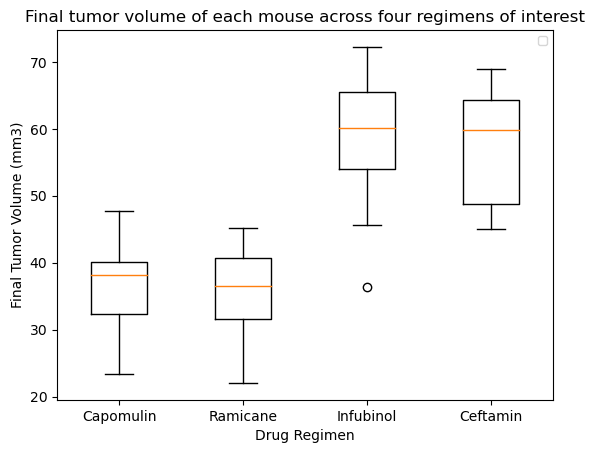

In [25]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data_to_plot = [capomulin_treat, Ramicane_treat, Infubinol_treat, Ceftamin_treat]

fig1, ax = plt.subplots()

ax.set_title('Final tumor volume of each mouse across four regimens of interest')
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.set_xlabel('Drug Regimen')

ax.boxplot(data_to_plot, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.savefig('boxplot')
plt.show()

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [26]:
#Find mouse treated with Capomulin

capomulin_lmerge_df.max()

#y793

camp_mouse=capomulin_df.loc[capomulin_df["Mouse ID"]=="y793",:]
camp_mouse.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
115,y793,Capomulin,Male,17,17,0,45.000000,0
116,y793,Capomulin,Male,17,17,5,41.019913,0
117,y793,Capomulin,Male,17,17,10,41.630010,1
118,y793,Capomulin,Male,17,17,15,42.283665,1
119,y793,Capomulin,Male,17,17,20,40.716428,2


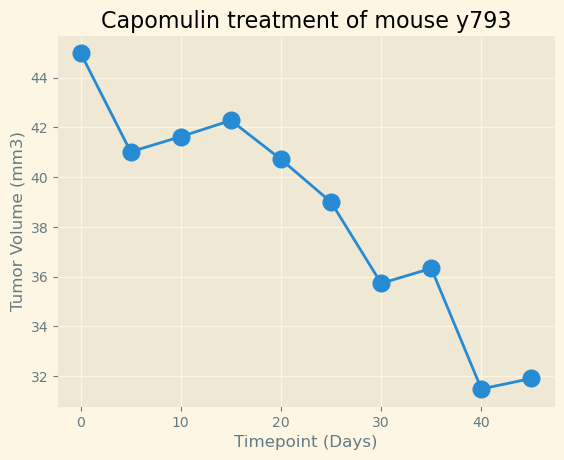

In [27]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
timept = camp_mouse["Timepoint"]
tumvol = camp_mouse["Tumor Volume (mm3)"]
plt.style.use('Solarize_Light2')

plt.title('Capomulin treatment of mouse y793')
plt.plot(timept, tumvol,linewidth=2, markersize=12,marker="o")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linechart for a mouse treated with Capomulin')
plt.show()

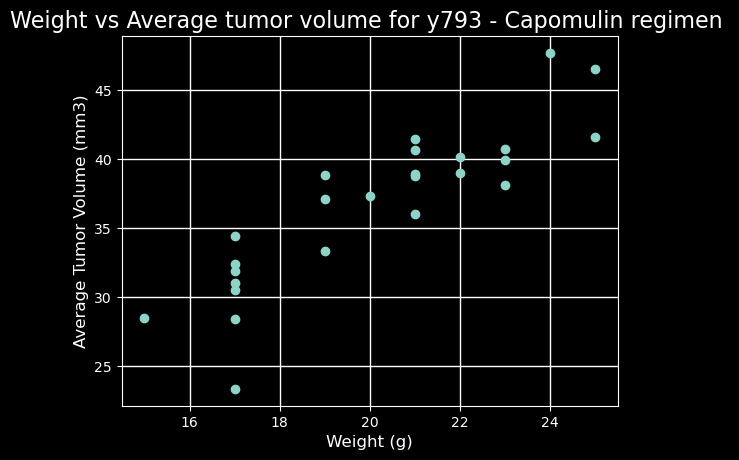

In [28]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
campavg = capomulin_lmerge_df.groupby(['Mouse ID']).mean()

plt.style.use('dark_background')


plt.scatter(campavg['Weight (g)'],campavg['Tumor Volume (mm3)'])
plt.title('Weight vs Average tumor volume for y793 - Capomulin regimen ')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('scatterplot')
plt.show()

## Correlation and Regression

In [29]:
# Calculate the correlation coefficient and linear regression model 
mice_corr=round(st.pearsonr(campavg['Weight (g)'],campavg['Tumor Volume (mm3)'])[0],2)

# for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation between mouse weight and average tumor volume is {mice_corr}")



The correlation between mouse weight and average tumor volume is 0.88


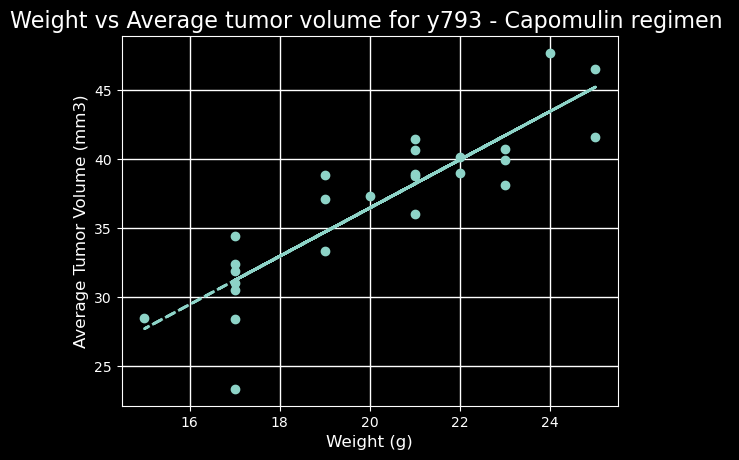

In [30]:
#Calculate slope, 
mt_slope, mt_int, mt_r, mt_p, mt_std_err = st.linregress(campavg['Weight (g)'],campavg['Tumor Volume (mm3)'])
mt_fit = mt_slope * campavg['Weight (g)'] + mt_int


plt.scatter(campavg['Weight (g)'],campavg['Tumor Volume (mm3)'])
plt.plot(campavg['Weight (g)'],mt_fit,"--")
plt.title('Weight vs Average tumor volume for y793 - Capomulin regimen ')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('scatterplot with linear regression')
plt.show()